In [1]:
import boto3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
dynamodb = boto3.resource('dynamodb', region_name='ap-northeast-1')
table = dynamodb.Table('dynamodb-env-keisuke-nakata')
ret = table.scan()
df = pd.DataFrame(data=ret['Items'])
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')

In [3]:
df.head()

,date,ambient,co2_ndir,co2_pas,humidity,address,voc,temperature,dust,room
0,2021-11-01 12:53:27,430,5000,586,43.5333251953125,85:a5:ca:78:5c:a4,86,26.430206298828125,0,NaN
1,2021-11-01 12:54:06,430,5000,586,43.5333251953125,85:a5:ca:78:5c:a4,87,26.430206298828125,0,NaN
2,2021-11-01 12:54:38,444,5000,586,43.5333251953125,85:a5:ca:78:5c:a4,98,26.430206298828125,0,NaN
3,2021-11-01 12:55:11,444,5000,586,43.5333251953125,85:a5:ca:78:5c:a4,93,26.430206298828125,0,NaN
4,2021-11-01 12:55:43,463,5000,586,43.5333251953125,85:a5:ca:78:5c:a4,94,26.430206298828125,0,NaN


In [4]:
def show_graph(df):
    plt.figure(figsize=(24, 12))

    plt.subplot(4,1,1)
    plt.title('ambient', fontsize=14)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M")) 
    plt.ylim(0, 200)
    plt.plot(df['date'], df[['ambient']])

    plt.subplot(4,1,2)
    plt.title('temperature/humidity', fontsize=14)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M")) 
    plt.ylim(0, 100)
    plt.plot(df['date'], df['temperature'], label='temperature')
    plt.plot(df['date'], df['humidity'], label='humidity')
    plt.legend()
    
    plt.subplot(4,1,3)
    plt.title('co2', fontsize=14)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M")) 
    plt.ylim(600, 1400)
    plt.plot(df['date'], df[['co2_pas']])

    plt.subplot(4,1,4)
    plt.title('voc', fontsize=14)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M")) 
    plt.ylim(0, 200)
    plt.plot(df['date'], df[['voc']])

# 隔離部屋(仕事部屋)

In [5]:
df_work = df[df['room'] == 'work']
df_work = df[df['date'] > '2021-11-01 22:00:00']
df_work.head()

,date,ambient,co2_ndir,co2_pas,humidity,address,voc,temperature,dust,room
84,2021-11-01 22:00:12,142,0,1269,56.98089599609375,85:a5:ca:78:5c:a4,125,23.994903564453125,0,work
85,2021-11-01 22:00:45,142,0,1228,56.94427490234375,85:a5:ca:78:5c:a4,124,23.994903564453125,0,work
86,2021-11-01 22:01:17,143,0,1244,56.9091796875,85:a5:ca:78:5c:a4,129,24.024276733398438,0,work
87,2021-11-01 22:01:50,143,0,1210,56.77947998046875,85:a5:ca:78:5c:a4,124,24.069671630859375,0,work
88,2021-11-01 22:02:22,142,0,1204,56.74591064453125,85:a5:ca:78:5c:a4,127,24.080352783203125,0,work


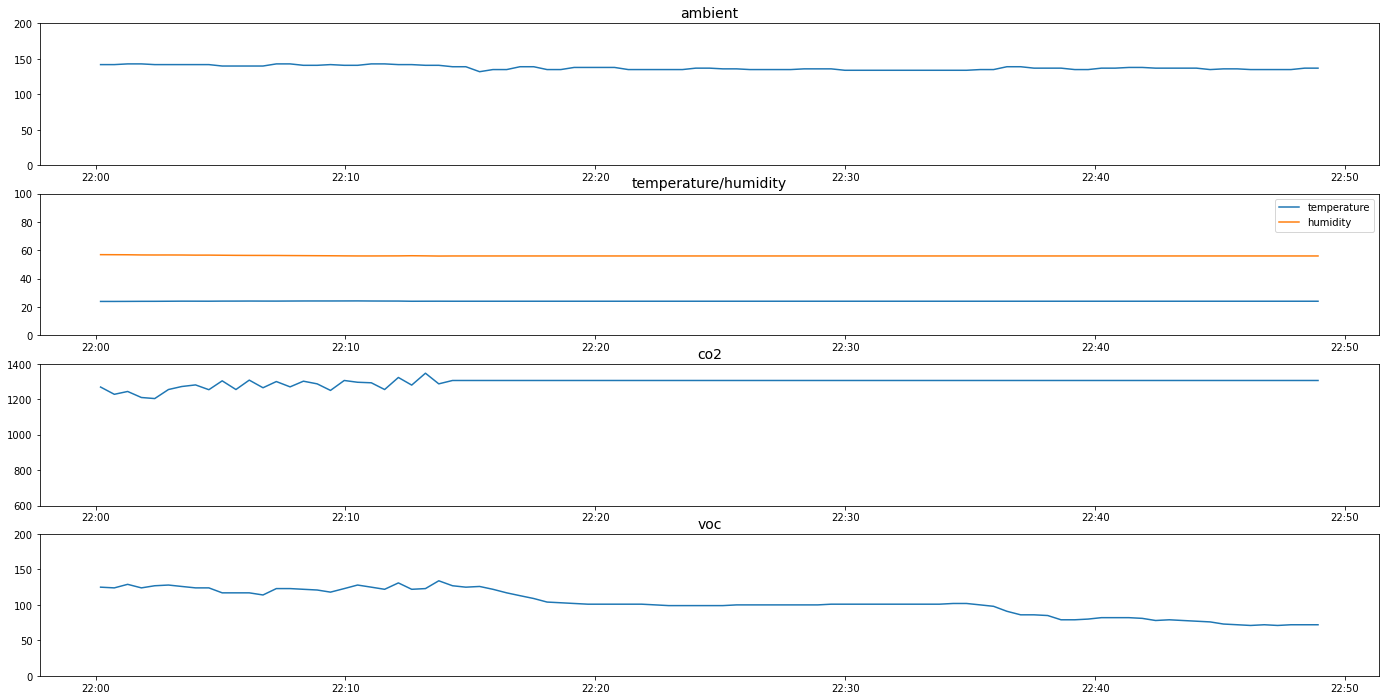

In [6]:
show_graph(df_work)

# リビング

# トイレ